<a href="https://colab.research.google.com/github/Rosalesmariana/SemModelacion-Financiera/blob/main/PROYECTO_FINAL_SMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SEMINARIO DE MODELACIÓN FINANCIERA**

Evaluación de proyecto- Programa para calcular el precio de opciones financieras

Autor: Mariana Rosales Morales

No. Serie MF062

u = 1.1440364840163457
d = 0.8740979977223455
p = 0.5197119053112977
Precio de la opción : 24.31



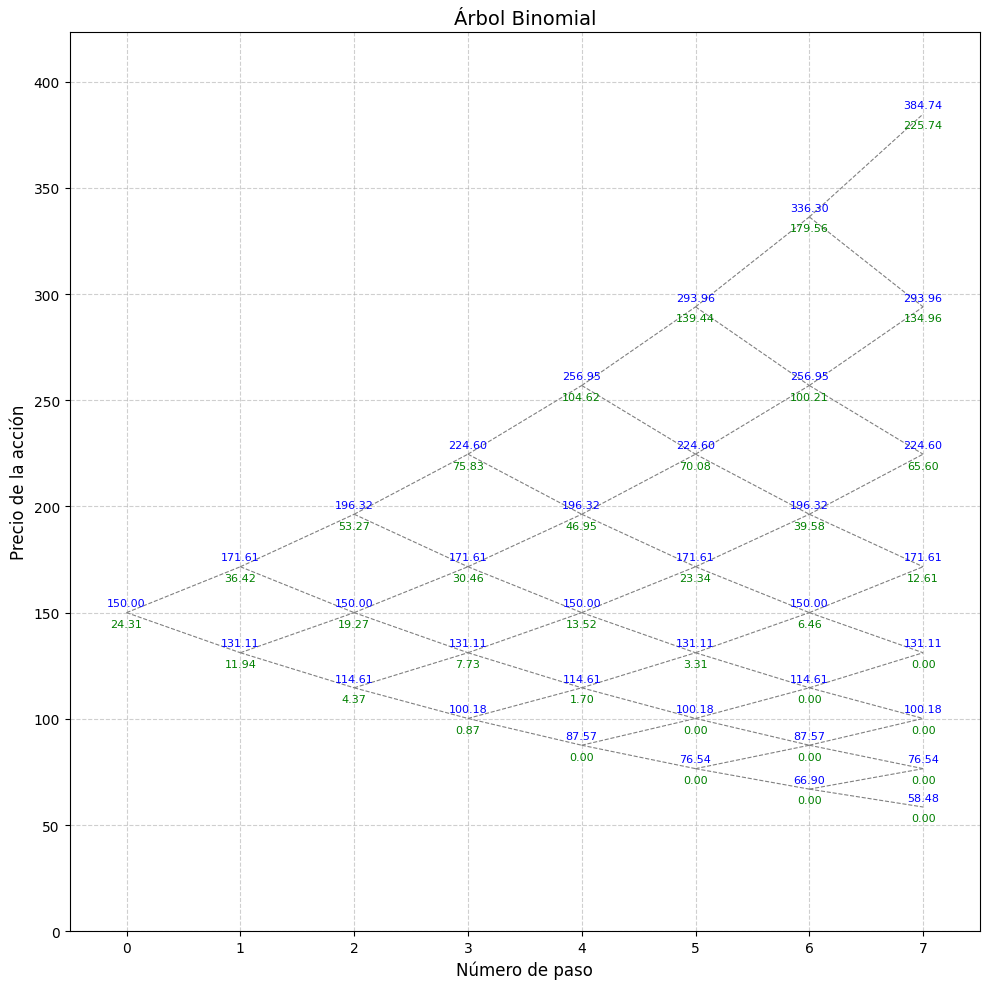

In [34]:
#Ejercicio 1
import numpy as np
import matplotlib.pyplot as plt

def arbol_binomial(S_0, K, T, r, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    print(f"u = {u}")
    d = 1 / u
    print(f"d = {d}")
    p = (np.exp(r * dt) - d) / (u - d)
    print(f"p = {p}")

    # Para los precios
    precio_acciones = np.zeros((N + 1, N + 1))
    precio_acciones[0, 0] = S_0
    for i in range(1, N + 1):
        for j in range(i + 1):
            precio_acciones[i, j] = S_0 * (u**j) * (d**(i - j))

    # Para las opciones
    precio_opciones = np.zeros((N + 1, N + 1))
    for i in range(N + 1):
        precio_opciones[N, i] = max(precio_acciones[N, i] - K, 0)

    # Calcular los valores de la opción hacia atrás en el árbol
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            precio_opciones[i, j] = np.exp(-r * dt) * (p * precio_opciones[i + 1, j + 1] + (1 - p) * precio_opciones[i + 1, j])

    return precio_opciones[0, 0], precio_acciones, precio_opciones

# Parametros
S_0 = 150  # Precio spot
K = 159  # Precio de ejercicio
T = 10/12  # Tiempo de vencimiento en años
r = 0.12  # Tasa libre de riesgo
sigma = 0.39  # Volatilidad
N = 7  # Número de periodos

precio_call, arbol_acciones, arbol_opciones = arbol_binomial(S_0, K, T, r, sigma, N)
print(f"Precio de la opción : {precio_call:.2f}")
print()

# Gráfica del árbol binomial
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-0.5, N + 0.5)
ax.set_ylim(np.min(arbol_acciones) * 0.7, np.max(arbol_acciones) * 1.1)
ax.set_xlabel('Número de paso', fontsize=12)
ax.set_ylabel('Precio de la acción', fontsize=12)
ax.set_title('Árbol Binomial', fontsize=14)

for i in range(N + 1):
    for j in range(i + 1):
        ax.text(i, arbol_acciones[i, j] + 2,f"{arbol_acciones[i,j]:.2f}", ha='center', va='bottom', fontsize=8, color='blue')  # Precio de la acción en azul
        ax.text(i, arbol_acciones[i, j] - 3,f"{arbol_opciones[i,j]:.2f}", ha='center', va='top', fontsize=8, color='green')  # Precio de la opción en verde
        if i < N:
            ax.plot([i, i + 1], [arbol_acciones[i, j], arbol_acciones[i + 1, j]], color='gray', linestyle='--', linewidth=0.8)
            ax.plot([i, i + 1], [arbol_acciones[i, j], arbol_acciones[i + 1, j + 1]], color='gray', linestyle='--', linewidth=0.8)


plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Valor de las opciones financieras:

Call Europeo (Binomial): 23.9622
Call Americano (Binomial): 23.9622
Put Europeo (Binomial): 17.8313
Put Americano (Binomial): 20.2831
Call Europeo (Black-Scholes): 23.9660
Put Europeo (Black-Scholes): 17.8351


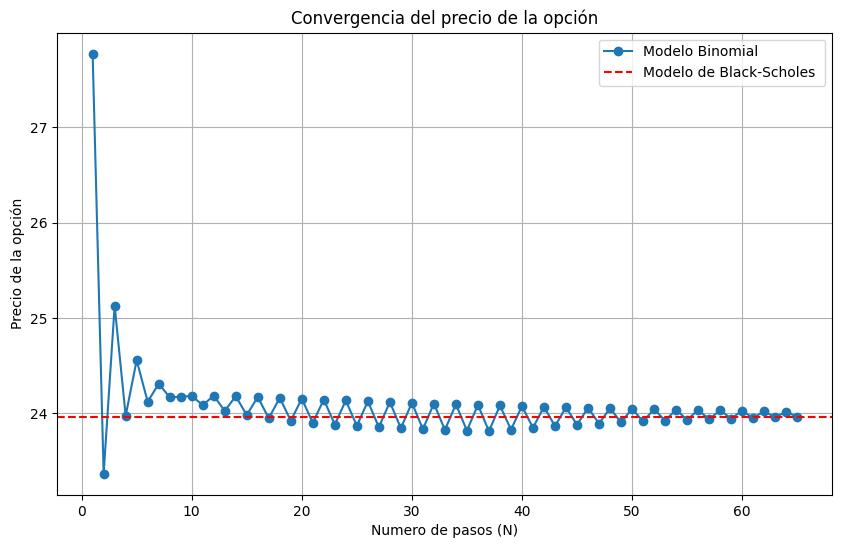


Se requieren al menos 4 periodos para una diferencia menor a 0.01
La diferencia es de 0.0088


In [35]:
#EJERCICIO 2
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#Modelo de Black-Scholes
def black_scholes(S_0, K, T, r, sigma, tipo_opcion="call"):
    d1 = (np.log(S_0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    if tipo_opcion == "call":
        valor = S_0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2) #c
    elif tipo_opcion == "put":
        valor = K * np.exp(-r * T) * norm.cdf(-d2) - S_0 * norm.cdf(-d1) #p
    else:
        raise ValueError("Use una opcion tipo 'call' o 'put'")
    return valor

#Modelo Binomial
def modelo_binomial(S_0, K, T, r, sigma, N, tipo_opcion="call", op_americana=False):
    dt = T / N #Delta t
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)


    precio_activo = np.array([S_0 * (u ** j) * (d ** (N - j)) for j in range(N + 1)])


    if tipo_opcion == "call":
        valor_opcion = np.maximum(precio_activo - K, 0) #C_u, #c_d
    elif tipo_opcion == "put":
        valor_opcion = np.maximum(K - precio_activo, 0) #P_u, P_d
    else:
        raise ValueError("Use una opcion tipo 'call' o 'put'")


    for i in range(N - 1, -1, -1):
        precio_activo = precio_activo[:-1] * u
        valor_opcion = (p * valor_opcion[1:] + (1 - p) * valor_opcion[:-1]) * np.exp(-r * dt)
        if op_americana:
            if tipo_opcion == "call":
                valor_opcion = np.maximum(valor_opcion, precio_activo - K)
            elif tipo_opcion == "put":
                valor_opcion = np.maximum(valor_opcion, K - precio_activo)

    return valor_opcion[0]

# Parametros
S_0 = 150  # Precio spot
K = 159  # Precio de ejercicio
T = 10/12    # Tiempo de vencimiento en años
r = 0.12 # TLR
sigma = 0.39 # Volatilidad
N = 65   # Numero de pasos para el modelo binomial

# Llamamos a las funciones para el modelo binomial

call_europeo_binomial = modelo_binomial(S_0, K, T, r, sigma, N, tipo_opcion="call", op_americana=False)
call_americano_binomial = modelo_binomial(S_0, K, T, r, sigma, N, tipo_opcion="call", op_americana=True)

put_europeo_binomial =modelo_binomial(S_0, K, T, r, sigma, N, tipo_opcion="put", op_americana=False)
put_americano_binomial =modelo_binomial(S_0, K, T, r, sigma, N, tipo_opcion="put", op_americana=True)

#Para rl modelo B & S
call_europeo_bs = black_scholes(S_0, K, T, r, sigma, tipo_opcion="call")
put_europeo_bs = black_scholes(S_0, K, T, r, sigma, tipo_opcion="put")

#Resultados
print("Valor de las opciones financieras:")
print()
print(f"Call Europeo (Binomial): {call_europeo_binomial:.4f}")
print(f"Call Americano (Binomial): {call_americano_binomial:.4f}")
print(f"Put Europeo (Binomial): {put_europeo_binomial:.4f}")
print(f"Put Americano (Binomial): {put_americano_binomial:.4f}")
print(f"Call Europeo (Black-Scholes): {call_europeo_bs:.4f}")
print(f"Put Europeo (Black-Scholes): {put_europeo_bs:.4f}")

# Grafica
paso = range(1, N + 1)
valor_call_binomial = [modelo_binomial(S_0, K, T, r, sigma, n, tipo_opcion="call", op_americana=False) for n in paso]
plt.figure(figsize=(10, 6))
plt.plot(paso, valor_call_binomial, label="Modelo Binomial ", marker="o")
plt.axhline(call_europeo_bs, color="red", linestyle="--", label="Modelo de Black-Scholes ")
plt.title("Convergencia del precio de la opción")
plt.xlabel("Numero de pasos (N)")
plt.ylabel("Precio de la opción")
plt.legend()
plt.grid()
plt.show()


#EJERCICIO 3

def encontrar_diferencia(S_0, K, T, r, sigma, tolerancia=0.01):
    for N in range(1, 1000):
        call_binomial = modelo_binomial(S_0, K, T, r, sigma, N, tipo_opcion="call", op_americana=False)
        call_bs = black_scholes(S_0, K, T, r, sigma, tipo_opcion="call")
        diferencia = abs(call_binomial - call_bs)
        if diferencia < tolerancia:
            return N, diferencia

# Llamar a la función
N_requerido, diferencia_minima = encontrar_diferencia(S_0, K, T, r, sigma)
print()
print(f"Se requieren al menos {N_requerido} periodos para una diferencia menor a 0.01")
print(f"La diferencia es de {diferencia_minima:.4f}")